In [159]:

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import seaborn as sb
rng = numpy.random

In [149]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 100

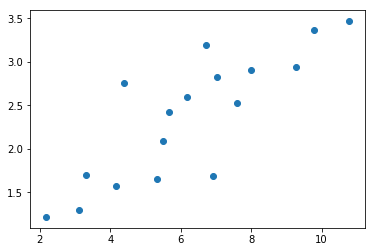

In [150]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

plt.scatter(train_X, train_Y)
plt.show()

In [151]:

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [152]:
rng.randn()

0.634398879798274

In [153]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [154]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [155]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [156]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [157]:
# Start training
sess=tf.Session()
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b)

print "Optimization Finished!"
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print "Final cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

pred_Y=sess.run(W) * train_X + sess.run(b)
print pred_Y

Epoch: 0100 cost= 0.204832464 W= 0.449503 b= -0.636665
Epoch: 0200 cost= 0.176995829 W= 0.426431 b= -0.470686
Epoch: 0300 cost= 0.155217364 W= 0.406022 b= -0.323865
Epoch: 0400 cost= 0.138178945 W= 0.387968 b= -0.193988
Epoch: 0500 cost= 0.124849148 W= 0.371998 b= -0.0791003
Epoch: 0600 cost= 0.114421077 W= 0.357871 b= 0.0225279
Epoch: 0700 cost= 0.106263317 W= 0.345374 b= 0.112427
Epoch: 0800 cost= 0.099881798 W= 0.33432 b= 0.191951
Epoch: 0900 cost= 0.094889984 W= 0.324542 b= 0.262296
Epoch: 1000 cost= 0.090985402 W= 0.315892 b= 0.324523
Optimization Finished!
Final cost= 0.0909854 W= 0.315892 b= 0.324523 

[ 1.36696555  1.71444627  2.06192699  2.44415578  2.51365193  1.64115943
  3.41362699  2.27736504  2.72214036  1.00906041  2.54903178  3.73330926
  2.00285527  2.85070823  2.11057429  3.25283819  1.30378724]


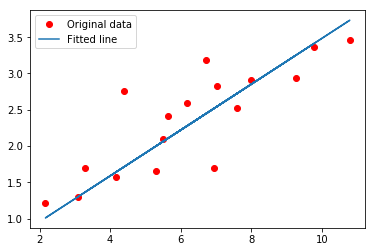

In [160]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, pred_Y, label='Fitted line')
plt.legend()
plt.show()